# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Análise Estatística Para Data Science com Linguagem Python</font>
## <font color='blue'>Análise Multivariada em Ciência de Dados</font>
## <font color='blue'>Projeto de Análise de Cluster</font>
### <font color='blue'>Por Que os Clientes Cancelam Seus Planos de Assinatura Mensal?</font>

## Instalando e Carregando os Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.18


In [ ]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q -U watermark

In [2]:
# Imports
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

scipy     : 1.12.0
seaborn   : 0.13.2
matplotlib: 3.8.2
sklearn   : 1.3.2
pandas    : 2.0.3
numpy     : 1.26.4



## Carregando e Explorando os Dados

In [4]:
# Set seed
np.random.seed(42)

In [5]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [6]:
# Shape
df_dsa.shape

(99, 6)

In [7]:
# Info
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Idade                99 non-null     int64  
 1   Gasto_Mensal         99 non-null     float64
 2   Tempo_de_Assinatura  99 non-null     int64  
 3   Taxa_de_Uso          99 non-null     float64
 4   Suporte_Tickets      99 non-null     int64  
 5   Cancelou             99 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 4.8 KB


In [8]:
# Primeiras linhas
df_dsa.head()

,Idade,Gasto_Mensal,Tempo_de_Assinatura,Taxa_de_Uso,Suporte_Tickets,Cancelou
0,24,373.305408,11,0.324511,2,0
1,32,343.998663,3,0.408387,1,0
2,28,433.277965,1,0.297518,0,0
3,25,169.345861,8,0.309093,0,0
4,24,256.424243,3,0.271016,0,0


In [10]:
df_dsa.sample(10)

,Idade,Gasto_Mensal,Tempo_de_Assinatura,Taxa_de_Uso,Suporte_Tickets,Cancelou
78,58,809.043734,22,0.878449,2,1
37,30,615.529319,13,0.790861,1,1
65,43,738.737801,15,0.527540,2,1
54,33,607.847345,15,0.780384,1,1
15,29,390.908798,8,0.191519,1,0
20,32,437.813539,8,0.423248,2,0
79,59,805.273395,21,0.887495,4,1
25,24,342.813699,11,0.457024,2,0
56,46,742.808347,12,0.655009,0,1
17,34,328.177590,1,0.215901,2,0


## Análise Exploratória e Limpeza de Dados

In [11]:
# Verificando valores nulos
print(df_dsa.isnull().sum())

Idade                  0
Gasto_Mensal           0
Tempo_de_Assinatura    0
Taxa_de_Uso            0
Suporte_Tickets        0
Cancelou               0
dtype: int64


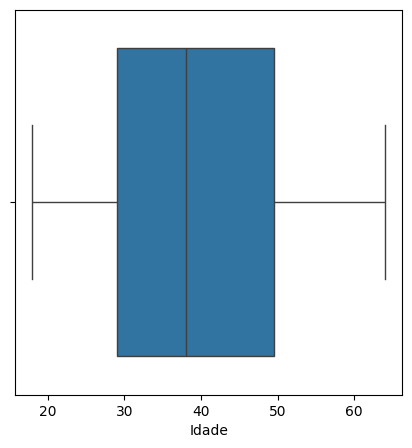

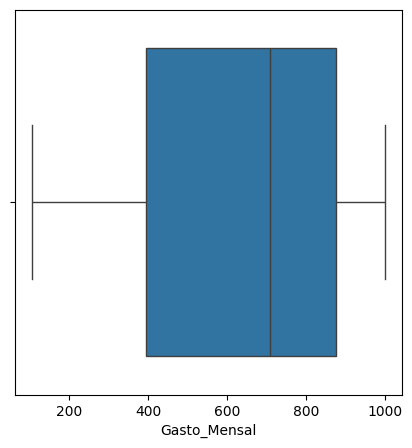

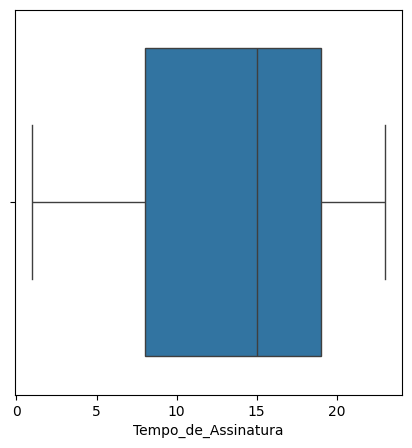

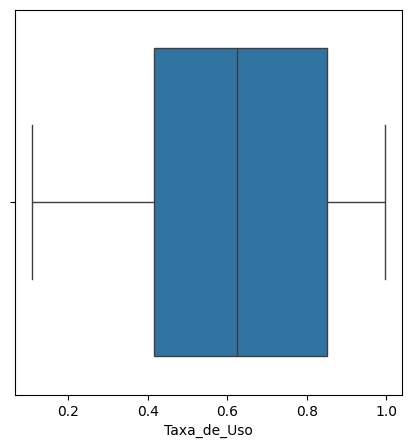

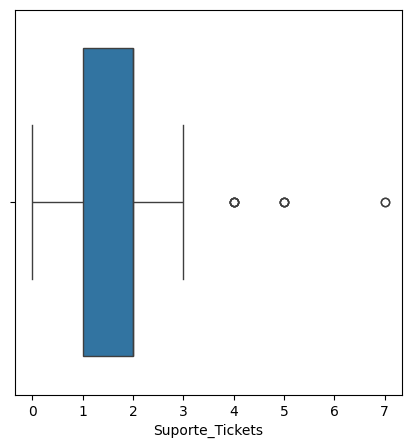

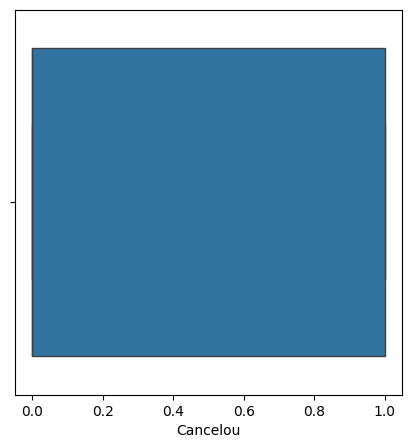

In [12]:
# Visualizando outliers para cada variável no DataFrame
for column in df_dsa.columns:
    if df_dsa[column].dtype in ['int64', 'float64']:
        plt.figure(figsize = (5, 5))
        sns.boxplot(x = df_dsa[column])
        plt.show()

In [14]:
df_dsa.describe()

,Idade,Gasto_Mensal,Tempo_de_Assinatura,Taxa_de_Uso,Suporte_Tickets,Cancelou
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,39.888889,639.071009,13.646465,0.604374,1.747475,0.494949
std,13.089869,270.618268,6.599804,0.263824,1.486974,0.502519
min,18.000000,106.254563,1.000000,0.110168,0.000000,0.000000
25%,29.000000,394.918421,8.000000,0.414928,1.000000,0.000000
50%,38.000000,709.104722,15.000000,0.623406,2.000000,0.000000
75%,49.500000,875.735422,19.000000,0.849839,2.000000,1.000000
max,64.000000,999.943535,23.000000,0.996007,7.000000,1.000000


In [15]:
# Define o Intervalo Interquartil
Q1 = df_dsa.quantile(0.25)
Q3 = df_dsa.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Idade                   20.500000
Gasto_Mensal           480.817001
Tempo_de_Assinatura     11.000000
Taxa_de_Uso              0.434911
Suporte_Tickets          1.000000
Cancelou                 1.000000
dtype: float64


In [16]:
# Vamos checar os valores que estão 1.5 acima ou abaixo do IQR. Esses valores são considerados outliers.
outliers = ((df_dsa < (Q1 - 1.5 * IQR)) | (df_dsa > (Q3 + 1.5 * IQR))).any(axis = 1)
df_outliers = df_dsa[outliers]
df_outliers

,Idade,Gasto_Mensal,Tempo_de_Assinatura,Taxa_de_Uso,Suporte_Tickets,Cancelou
39,41,595.076602,14,0.512320,4,1
40,48,550.847824,12,0.619646,7,1
41,43,667.040379,13,0.630056,5,0
57,46,743.034018,16,0.697133,5,0
63,34,694.989179,17,0.536049,7,1
79,59,805.273395,21,0.887495,4,1
80,45,875.292673,23,0.980832,4,1
87,52,968.423785,19,0.989904,4,1
89,56,893.738632,23,0.985318,4,1
95,53,999.943535,23,0.865750,5,1


In [17]:
# Calculando a matriz de correlação
correlation_matrix = df_dsa.corr()

In [18]:
correlation_matrix

,Idade,Gasto_Mensal,Tempo_de_Assinatura,Taxa_de_Uso,Suporte_Tickets,Cancelou
Idade,1.000000,0.856041,0.814066,0.846363,0.431047,0.624298
Gasto_Mensal,0.856041,1.000000,0.914275,0.912730,0.378802,0.651229
Tempo_de_Assinatura,0.814066,0.914275,1.000000,0.891799,0.427516,0.687107
Taxa_de_Uso,0.846363,0.912730,0.891799,1.000000,0.380526,0.643879
Suporte_Tickets,0.431047,0.378802,0.427516,0.380526,1.000000,0.278220
Cancelou,0.624298,0.651229,0.687107,0.643879,0.278220,1.000000


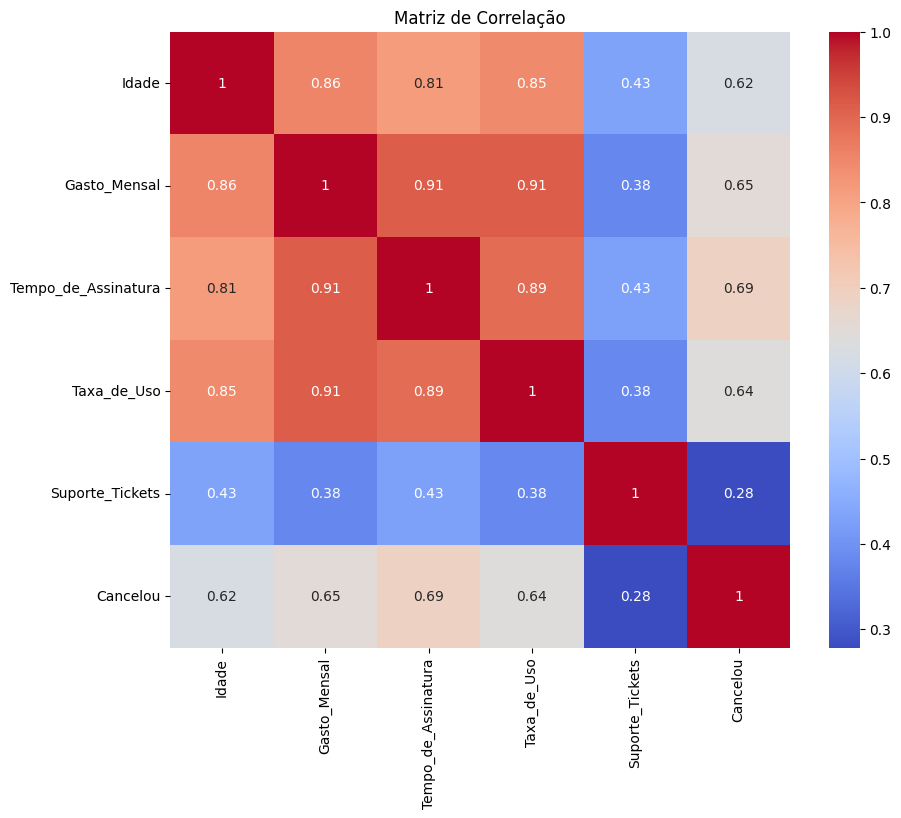

In [19]:
# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Matriz de Correlação')
plt.show()

A correlação pode ter impacto significativo em modelos de clusterização como o KMeans, pois o KMeans utiliza a distância euclidiana entre os pontos para formar clusters. Variáveis altamente correlacionadas podem influenciar desproporcionalmente as distâncias entre os pontos, levando a possíveis distorções nos clusters formados.

Precisamos considerar os pontos abaixo:

1. Multicolinearidade

Se duas variáveis são altamente correlacionadas (multicolinearidade), isso pode resultar em redundância e pode não agregar valor ao modelo, potencialmente prejudicando a formação de clusters. Você pode remover uma variável quando ela estiver muito correlacionada com outra.

2. Escala das Variáveis

A correlação também pode ser um indicativo da necessidade de normalizar as variáveis, principalmente quando se está lidando com variáveis em escalas diferentes, já que o KMeans é sensível à escala das variáveis.

3. Redução de Dimensionalidade

A análise de correlação pode ser um passo preliminar à aplicação de técnicas de redução de dimensionalidade como PCA (Principal Component Analysis), que pode ser útil para mitigar problemas de multicolinearidade e para acelerar o processo de agrupamento quando se tem um grande número de variáveis.

Portanto, antes de aplicar o KMeans, geralmente é aconselhável realizar os seguintes passos com base na análise de correlação:

- Remoção ou combinação de variáveis altamente correlacionadas para reduzir a multicolinearidade.
- Normalização ou padronização das variáveis para garantir que todas estejam na mesma escala.
- Considerar a redução de dimensionalidade se o conjunto de dados tiver um grande número de variáveis.

In [21]:
# Padronizando as Variáveis
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_dsa), columns = df_dsa.columns)

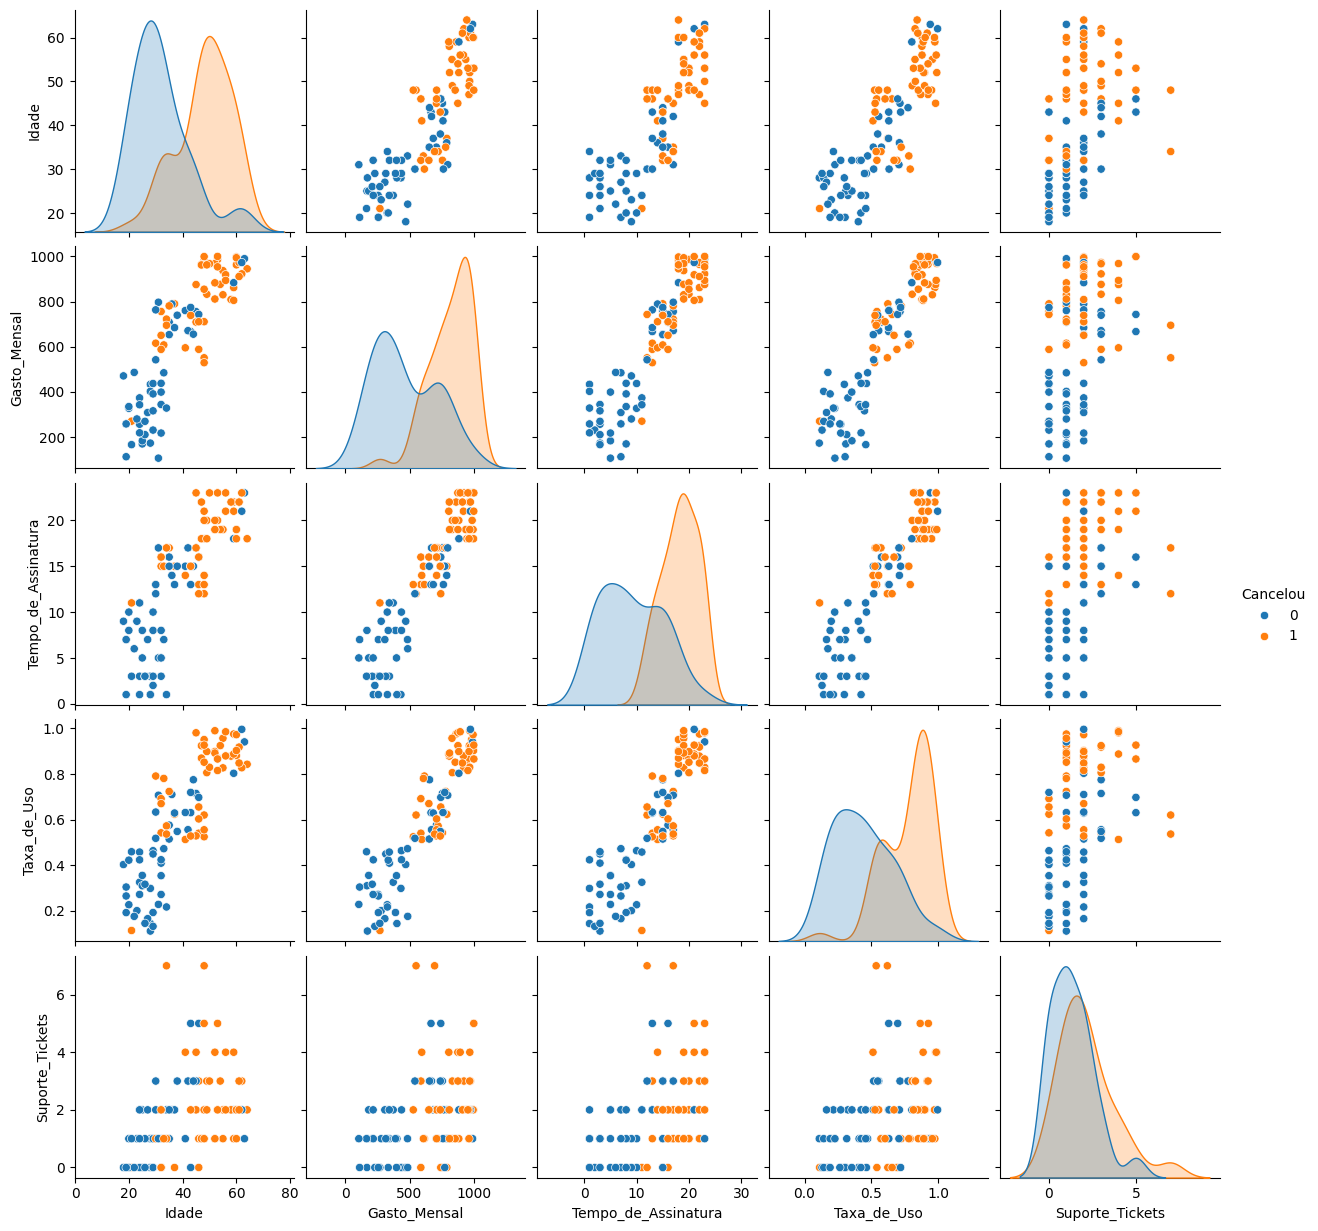

In [22]:
# Visualização de Dados com PairPlot
sns.pairplot(df_dsa, hue = 'Cancelou', diag_kind = 'kde')
plt.show()

## Definindo o Valor de K em Modelos de Clusterização

O valor de k em métodos de agrupamento, como o K-Means, refere-se ao número de clusters que o algoritmo deve formar. 

A escolha do valor adequado de k é uma etapa importante do trabalho que estamos fazendo, pois pode afetar significativamente a utilidade dos clusters formados. 

Abaixo estão alguns métodos que podem ser usados para escolher o valor de k. Mas SEMPRE use bom senso em primeiro lugar ao escolher o número de clusters.

### Método do Cotovelo (Elbow Method)

Este é um dos métodos mais comuns para encontrar o valor ótimo de k. Ele envolve executar o algoritmo de agrupamento para diferentes valores de k e calcular a soma dos quadrados intra-cluster (SSE) para cada valor de k. O valor de k onde a redução da SSE começa a diminuir mais lentamente (o "cotovelo" da curva) é considerado o valor ótimo de k.

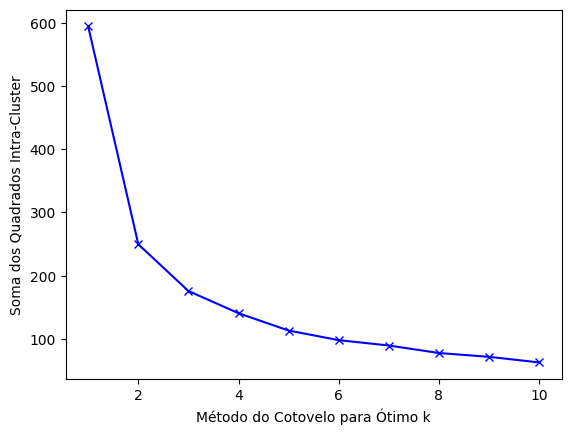

In [23]:
# Lista para calcular o SSE
sse = []

# Range de valores de k a serem testados
k_range = range(1, 11)

# Testando os valores
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Plot
plt.plot(k_range, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('Soma dos Quadrados Intra-Cluster')
plt.xlabel('Método do Cotovelo para Ótimo k')
plt.show()

### Método da Silhueta (Silhouette Method)

Este método mede a qualidade dos clusters. Um coeficiente de silhueta mais alto indica que os objetos estão bem emparelhados aos seus próprios clusters e mal emparelhados aos clusters vizinhos. Geralmente, você escolherá o número de clusters que proporciona o maior coeficiente de silhueta.

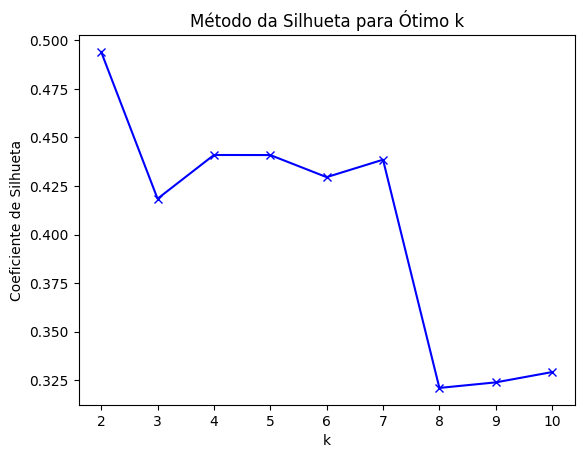

In [24]:
# Lista para o Silhouette score
sil_score = []

# Loop pelo range de valores de k a serem testados
for k in k_range:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_scaled)
    
    # Silhouette score não é definido para k = 1
    if k != 1:
        sil_score.append(silhouette_score(df_scaled, kmeans.labels_))

# Plot
plt.plot(k_range[1:], sil_score, 'bx-')
plt.xlabel('k')
plt.ylabel('Coeficiente de Silhueta')
plt.title('Método da Silhueta para Ótimo k')
plt.show()

## Construção da Primeira Versão do Modelo de Clusterização

In [25]:
# Modelo com 4 clusters
modelo_kmeans_dsa = KMeans(n_clusters = 4, random_state = 42)

In [26]:
# Treina o modelo e salva o resultado em uma coluna do dataframe original
df_dsa['cluster'] = modelo_kmeans_dsa.fit_predict(df_scaled)

In [27]:
# Amostra aleatória de dados
df_dsa.sample(10)

,Idade,Gasto_Mensal,Tempo_de_Assinatura,Taxa_de_Uso,Suporte_Tickets,Cancelou,cluster
5,28,172.894435,3,0.110168,1,0,1
29,31,106.254563,5,0.227201,1,0,1
44,42,671.018351,17,0.555300,3,0,2
83,55,830.083378,19,0.956731,1,1,0
26,26,210.399673,3,0.315737,1,0,1
91,48,854.681414,20,0.851649,1,1,0
77,61,973.212778,22,0.917984,3,1,0
67,60,962.759004,19,0.880697,1,1,0
53,48,710.745225,14,0.554860,2,1,3
43,35,708.808939,16,0.575258,1,0,2


In [28]:
df_dsa.shape

(99, 7)

In [29]:
# Mantém apenas as linhas que não são outliers
df_dsa_cleaned = df_dsa
#df_dsa_cleaned = df_dsa[~outliers]

In [30]:
df_dsa_cleaned.shape

(99, 7)

> Vamos criar um PairGrid.

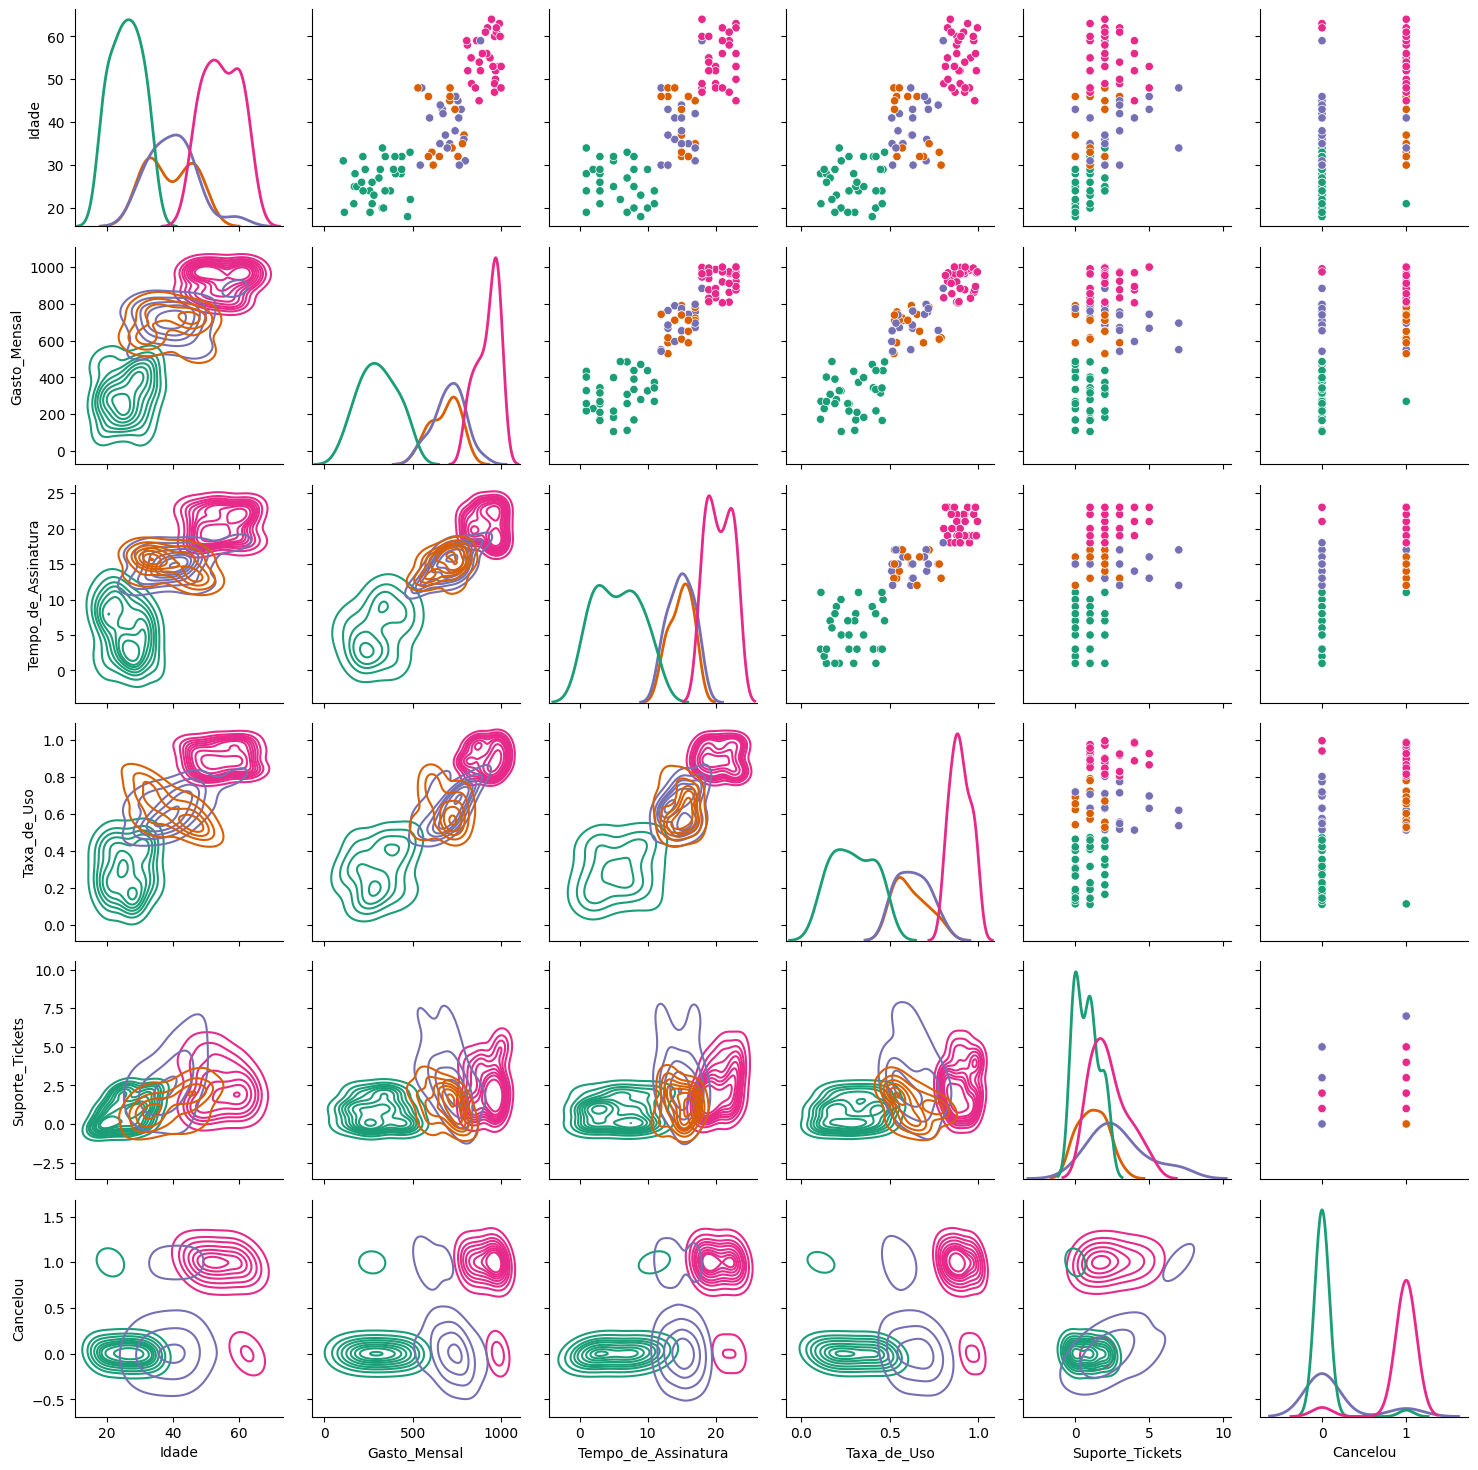

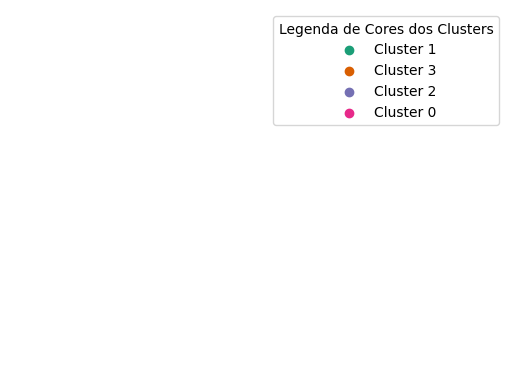

In [31]:
# Criando um mapa de cores baseado na paleta 'Dark2'
palette = sns.color_palette('Dark2', n_colors = len(df_dsa_cleaned['cluster'].unique()))
color_map = dict(zip(df_dsa_cleaned['cluster'].unique(), palette))

# Plotando o gráfico de grid com os clusters e mostrando o mapa de cores
g = sns.PairGrid(df_dsa_cleaned, hue = 'cluster', palette = color_map, diag_sharey = False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw = 2)
plt.show()

# Mostrando o mapa de cores
for cluster, color in color_map.items():
    plt.scatter([], [], c = [color], label = f'Cluster {cluster}')
plt.legend(title = 'Legenda de Cores dos Clusters')
plt.axis('off')
plt.show()

## Construção da Segunda Versão do Modelo de Clusterização

In [32]:
# Modelo com 3 clusters
modelo_kmeans_dsa = KMeans(n_clusters = 3, random_state = 42)

In [33]:
df_dsa.drop('cluster', axis = 1, inplace = True)

In [34]:
df_dsa.head()

,Idade,Gasto_Mensal,Tempo_de_Assinatura,Taxa_de_Uso,Suporte_Tickets,Cancelou
0,24,373.305408,11,0.324511,2,0
1,32,343.998663,3,0.408387,1,0
2,28,433.277965,1,0.297518,0,0
3,25,169.345861,8,0.309093,0,0
4,24,256.424243,3,0.271016,0,0


In [35]:
# Treina o modelo e salva o resultado em uma coluna do dataframe original
df_dsa['cluster'] = modelo_kmeans_dsa.fit_predict(df_scaled)

In [36]:
# Amostra aleatória de dados
df_dsa.sample(10)

,Idade,Gasto_Mensal,Tempo_de_Assinatura,Taxa_de_Uso,Suporte_Tickets,Cancelou,cluster
41,43,667.040379,13,0.630056,5,0,0
98,53,953.797483,23,0.815173,2,1,1
42,35,780.846432,17,0.723213,1,1,0
45,48,529.152948,13,0.524262,2,1,0
55,32,588.077553,16,0.691481,0,1,0
87,52,968.423785,19,0.989904,4,1,1
46,37,684.502168,13,0.628494,2,0,0
10,19,112.525317,7,0.303428,0,0,2
60,35,653.402720,15,0.514315,2,0,0
90,52,882.963900,20,0.898423,1,1,1


In [37]:
# Mantém apenas as linhas que não são outliers
df_dsa_cleaned = df_dsa[~outliers]

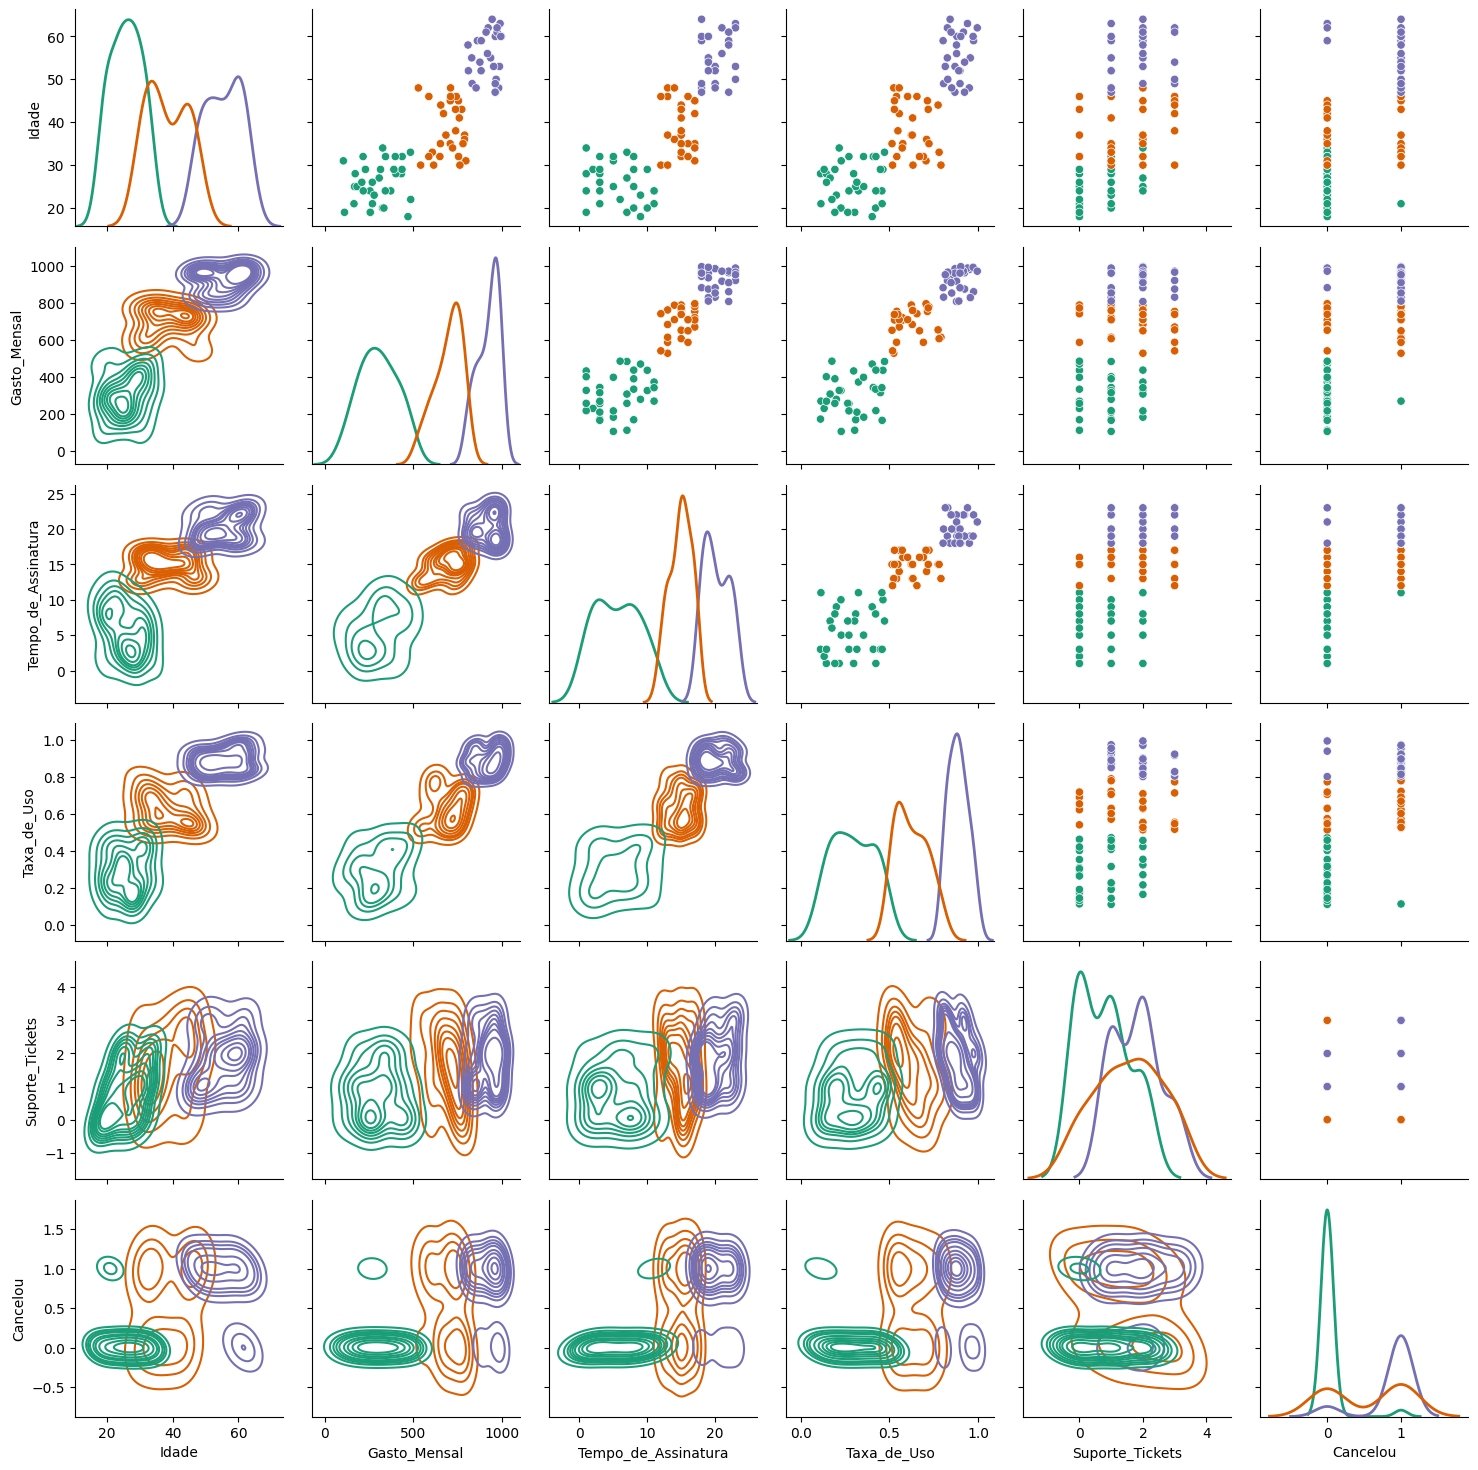

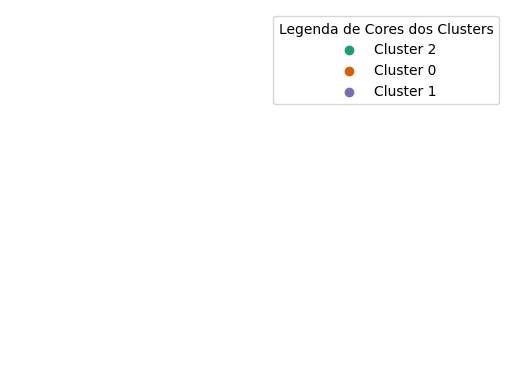

In [38]:
# Criando um mapa de cores baseado na paleta 'Dark2'
palette = sns.color_palette('Dark2', n_colors = len(df_dsa_cleaned['cluster'].unique()))
color_map = dict(zip(df_dsa_cleaned['cluster'].unique(), palette))

# Plotando o gráfico de grid com os clusters e mostrando o mapa de cores
g = sns.PairGrid(df_dsa_cleaned, hue = 'cluster', palette = color_map, diag_sharey = False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw = 2)
plt.show()

# Mostrando o mapa de cores
for cluster, color in color_map.items():
    plt.scatter([], [], c = [color], label = f'Cluster {cluster}')
plt.legend(title = 'Legenda de Cores dos Clusters')
plt.axis('off')
plt.show()


Analisando os gráficos podemos identificar segmentações nos usuários que cancelaram suas assinaturas. Avalie os padrões, distribuições, sobreposições entre os clusters. Faça interpretações baseadas nos agrupamentos, investigando as características predominantes em cada cluster e como elas podem estar associadas ao cancelamento da assinatura.

Após a interpretação, resuma os achados principais e proponha recomendações estratégicas baseadas nos insights obtidos, como por exemplo, estratégias de retenção direcionadas a cada segmento identificado.

## Analisando os Clusters do Modelo Escolhido

Vamos fazer agora uma análise dos clusters.

In [39]:
df_dsa_cleaned.sample(10)

,Idade,Gasto_Mensal,Tempo_de_Assinatura,Taxa_de_Uso,Suporte_Tickets,Cancelou,cluster
15,29,390.908798,8,0.191519,1,0,2
19,33,484.468810,7,0.471879,1,0,2
50,30,763.211922,13,0.632706,2,0,0
48,30,542.025205,12,0.517458,3,0,0
2,28,433.277965,1,0.297518,0,0,2
27,24,218.509402,1,0.422976,1,0,2
25,24,342.813699,11,0.457024,2,0,2
73,64,945.143902,18,0.842593,2,1,1
70,48,982.185437,18,0.951027,1,1,1
82,60,997.455226,18,0.902798,2,1,1


### Centróides dos Clusters

Primeiro, você pode examinar os centroides de cada cluster para identificar quais características são predominantes em cada grupo.

In [40]:
# Extrai os centróides
centroides = modelo_kmeans_dsa.cluster_centers_

A saída abaixo refere-se aos centroides dos clusters encontrados pelo algoritmo KMeans. Os centroides são os pontos centrais de cada cluster e são usados pelo algoritmo para determinar a qual cluster uma determinada observação pertence, com base na menor distância euclidiana.

Dado o output, nós temos 3 clusters (porque há 3 linhas de números) e cada cluster tem 6 características (porque há 6 números em cada linha).

In [41]:
print(centroides)

[[-0.07057899  0.19082299  0.18305656  0.06948432  0.29358547  0.10101525]
 [ 1.14865372  1.05786786  1.04142262  1.11634458  0.35503359  0.82832509]
 [-1.07807472 -1.24869086 -1.22447918 -1.1858289  -0.64861907 -0.92934034]]


**Interpretação**:

- O Cluster 0 (primeira linha acima) contém em sua maioria clientes de ambos os grupos, cancelou e não cancelou. Observe que os valores estão próximos de 0, o que sugere que este cluster pode estar centrado próximo à média do conjunto de dados, assumindo que os dados foram normalizados ou padronizados.

----

- O Cluster 1 (segunda linha acima) contém em sua maioria clientes do grupo que cancelou a assinatura. Os valores são positivos e superiores a 1 para a maioria das dimensões, o que sugere que as observações neste cluster têm valores superiores à média para estas dimensões.

----

- O Cluster 2 (terceira linha abaixo) contém em sua maioria clientes do grupo que não cancelou a assinatura. Os valores são negativos e inferiores a -1 para a maioria das dimensões, o que sugere que as observações neste cluster têm valores inferiores à média para estas dimensões.

A interpretação acima é baseada na suposição de que os dados foram normalizados ou padronizados. Se os dados não foram normalizados/padronizados, a interpretação pode ser diferente.

Além disso, para obter uma compreensão mais clara do que cada cluster representa em termos de seus dados originais, você pode analisar as observações dentro de cada cluster e tentar identificar padrões ou características comuns. É o que faremos a seguir.

Veja quantas observações foram atribuídas a cada cluster para entender o tamanho deles.

In [42]:
df_dsa['cluster'].value_counts()

cluster
2    33
0    33
1    33
Name: count, dtype: int64

### Análise de Silhueta

Uma métrica útil para avaliar a qualidade dos clusters é a análise de silhueta. Valores mais próximos de 1 indicam que os pontos de dados são muito semelhantes aos outros pontos de dados no mesmo cluster e muito diferentes dos pontos de dados nos outros clusters. Já valores negativos indicam que os pontos de dados podem ter sido agrupados no cluster errado.

In [43]:
df_dsa.groupby('cluster').mean()

,Idade,Gasto_Mensal,Tempo_de_Assinatura,Taxa_de_Uso,Suporte_Tickets,Cancelou
cluster,,,,,,
0,38.969697,690.449726,14.848485,0.622612,2.181818,0.545455
1,54.848485,923.899857,20.484848,0.897401,2.272727,0.909091
2,25.848485,302.863443,5.606061,0.293108,0.787879,0.030303


In [44]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_scaled, df_dsa['cluster'])
print(score)

0.41846445080765354


### 2D Scatter Plot (Para 2 características)

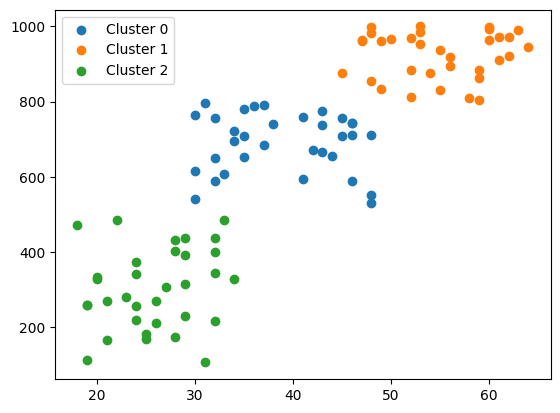

In [45]:
import matplotlib.pyplot as plt

plt.scatter(df_dsa[df_dsa['cluster'] == 0]['Idade'], df_dsa[df_dsa['cluster'] == 0]['Gasto_Mensal'], label='Cluster 0')
plt.scatter(df_dsa[df_dsa['cluster'] == 1]['Idade'], df_dsa[df_dsa['cluster'] == 1]['Gasto_Mensal'], label='Cluster 1')
plt.scatter(df_dsa[df_dsa['cluster'] == 2]['Idade'], df_dsa[df_dsa['cluster'] == 2]['Gasto_Mensal'], label='Cluster 2')
plt.legend()
plt.show()

### 3D Scatter Plot (Para 3 características)

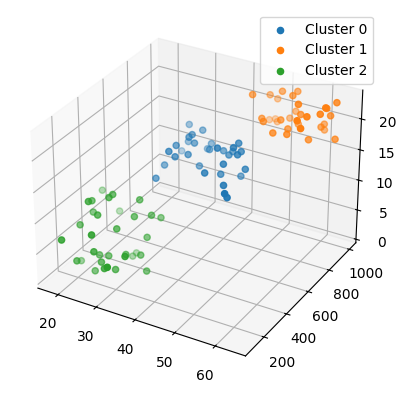

In [46]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_dsa[df_dsa['cluster'] == 0]['Idade'], df_dsa[df_dsa['cluster'] == 0]['Gasto_Mensal'], df_dsa[df_dsa['cluster'] == 0]['Tempo_de_Assinatura'], label='Cluster 0')
ax.scatter(df_dsa[df_dsa['cluster'] == 1]['Idade'], df_dsa[df_dsa['cluster'] == 1]['Gasto_Mensal'], df_dsa[df_dsa['cluster'] == 1]['Tempo_de_Assinatura'], label='Cluster 1')
ax.scatter(df_dsa[df_dsa['cluster'] == 2]['Idade'], df_dsa[df_dsa['cluster'] == 2]['Gasto_Mensal'], df_dsa[df_dsa['cluster'] == 2]['Tempo_de_Assinatura'], label='Cluster 2')

ax.legend()
plt.show()


### Redução de Dimensionalidade (Para mais de 3 características)

Quando você tem mais de três características, visualizações diretas tornam-se desafiadoras. Uma abordagem comum é usar técnicas de redução de dimensionalidade, como PCA (Principal Component Analysis) ou t-SNE

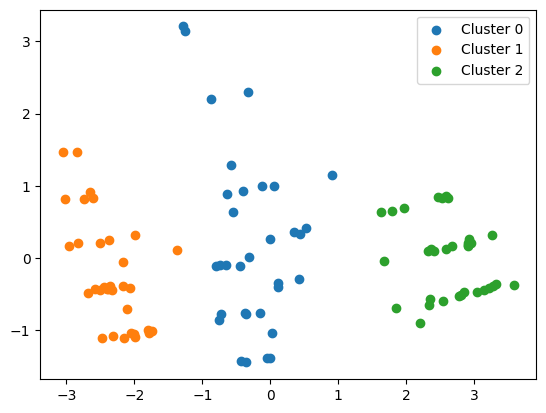

In [47]:
# Visualização com PCA
from sklearn.decomposition import PCA

# Cria o modelo PCA com 2 componentes principais
pca = PCA(n_components = 2)

# Treina o modelo usando dados padronizados
principalComponents = pca.fit_transform(df_scaled)

# Cria o dataframe com o resultado
df_principal = pd.DataFrame(data = principalComponents, columns = ['PC_1', 'PC_2'])
df_principal['cluster'] = df_dsa['cluster']

# Cria o gráfico
plt.scatter(df_principal[df_principal['cluster'] == 0]['PC_1'], df_principal[df_principal['cluster'] == 0]['PC_2'], label = 'Cluster 0')
plt.scatter(df_principal[df_principal['cluster'] == 1]['PC_1'], df_principal[df_principal['cluster'] == 1]['PC_2'], label = 'Cluster 1')
plt.scatter(df_principal[df_principal['cluster'] == 2]['PC_1'], df_principal[df_principal['cluster'] == 2]['PC_2'], label = 'Cluster 2')
plt.legend()
plt.show()

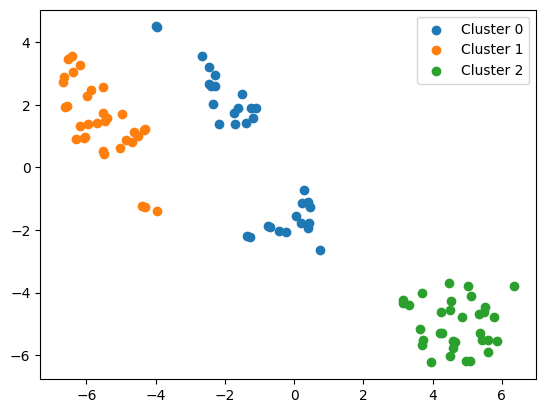

In [50]:
# Visualização com t-SNE (t-distributed Stochastic Neighbor Embedding) 
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
tsne_results = tsne.fit_transform(df_scaled)
df_tsne = pd.DataFrame(data = tsne_results, columns = ['tsne_1', 'tsne_2'])
df_tsne['cluster'] = df_dsa['cluster']

plt.scatter(df_tsne[df_tsne['cluster'] == 0]['tsne_1'], df_tsne[df_tsne['cluster'] == 0]['tsne_2'], label = 'Cluster 0')
plt.scatter(df_tsne[df_tsne['cluster'] == 1]['tsne_1'], df_tsne[df_tsne['cluster'] == 1]['tsne_2'], label = 'Cluster 1')
plt.scatter(df_tsne[df_tsne['cluster'] == 2]['tsne_1'], df_tsne[df_tsne['cluster'] == 2]['tsne_2'], label = 'Cluster 2')
plt.legend()
plt.show()

### Cluster Plot

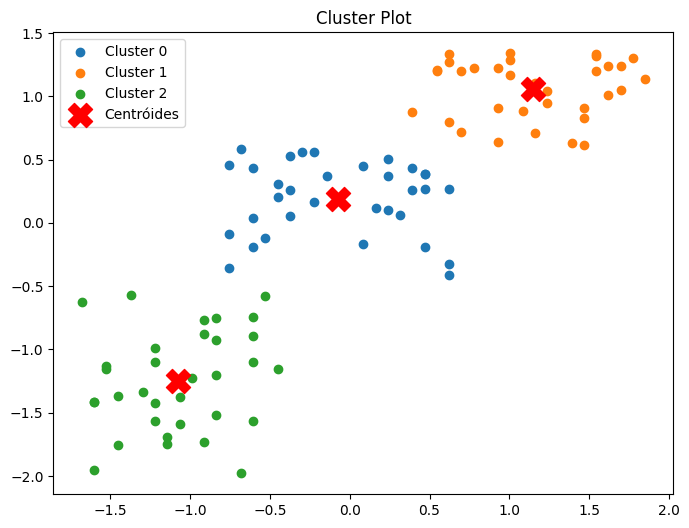

In [53]:
# Para dados 2D
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

for cluster_num in range(3):
    mask = df_dsa['cluster'] == cluster_num
    plt.scatter(df_scaled[mask].iloc[:, 0], df_scaled[mask].iloc[:, 1], label = f"Cluster {cluster_num}")
    
plt.scatter(modelo_kmeans_dsa.cluster_centers_[:, 0],
            modelo_kmeans_dsa.cluster_centers_[:, 1],
            s = 300,
            c = 'red',
            marker = 'X',
            label = 'Centróides')

plt.legend()
plt.title("Cluster Plot")
plt.show()

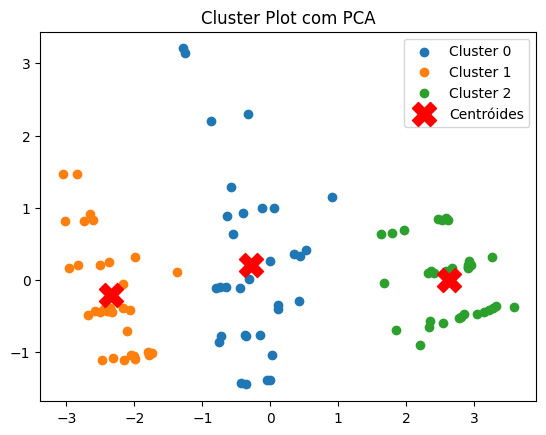

In [55]:
# Para mais de 2 dimensões usamos PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

pca_result = pca.fit_transform(df_scaled)

df_dsa['pca_1'] = pca_result[:, 0]
df_dsa['pca_2'] = pca_result[:, 1]

for cluster_num in range(3):
    mask = df_dsa['cluster'] == cluster_num
    plt.scatter(df_dsa[mask]['pca_1'], df_dsa[mask]['pca_2'], label = f'Cluster {cluster_num}')

# Obtenha os centroides transformados para a visualização
centroids_pca = pca.transform(modelo_kmeans_dsa.cluster_centers_)
plt.scatter(centroids_pca[:, 0],
            centroids_pca[:, 1],
            s = 300,
            c = 'red',
            marker = 'X',
            label = 'Centróides')

plt.legend()
plt.title("Cluster Plot com PCA")
plt.show()

In [56]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

scipy     : 1.12.0
seaborn   : 0.13.2
matplotlib: 3.8.2
sklearn   : 1.3.2
pandas    : 2.0.3
numpy     : 1.26.4



# Fim